# Chapter Two -  Compartmental models

```{contents} Table of Contents
:depth: 3
```

In [96]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## The SIR compartmental model 
In what follows below, we'll derive the SIR compartmental model for frequency and density-dependent transmission.
The SIR model is a **deterministic**---re-running the model for the same initial conditions and same parameter values produces the same output---description of how animals (humans are animals) move between three disease states: susceptible, infected, and recovered/removed.  

### From S into I ($S \to I$)

For a susceptible individual to become infected, we must assess the probability that they contact an infected individual and the probability that an infected individual successfully transmits the pathogen to the susceptible individual. 

Suppose that a single susceptible individual, out of a total of $N$ individuals in the system, comes into contact with $C$ other individuals on average in a small interval of time called $\Delta t$.
For example, $\Delta t$ might be a day or hours. 
However, we are interested in the number of contacts between a susceptible animal and an infected individual.
We can reason that, if an animal comes into contact with 5 others in a time unit $\Delta t$ and $1/4$ of the animals in the system are infectors then $5/4$ of the contacts are infectors. 
That is, the average number of contacts between a susceptible and infectors is $\left[ C \cdot \frac{I}{N} \right] \cdot \Delta t$. 
Let $p$ denote the probability of transmission, or the probability that when an infector contacts a susceptible that transmit the pathogen. 
Then the probability that a susceptible is infected equals 
\begin{align}
    1 - (1-p)^{ C \cdot \frac{I}{N} \cdot \Delta t }. 
\end{align}

Just as with the the Reed-Frost model, we can approximate the above as 

\begin{align}
    1 - (1-p)^{ C \cdot \frac{I}{N} \cdot \Delta t } &\approx 1 - e^{ -p \cdot C \cdot \frac{I}{N} \cdot \Delta t} \\ 
                                      &\approx  \left(p \cdot C\right) \cdot \frac{I}{N} \cdot \Delta t \\ 
                                      &\approx  \beta \cdot \frac{I}{N} \cdot \Delta t \\
\end{align}

where we replaced the average number of contacts that result in transmission $pC$ with the parameter $\beta$. 
The above expression is the average probability at which a single susceptible individual is infected. 

---
**How this relates to the Reed-frost model**
For the Reed-Frost model, the probability of infection was 
$1 - (1-p)^{i_{t}}$ where $i_{t}$ was the exact number of infectors in the system, and, in the Reed-Frost model, we suppose each animal comes into contact with every other animal in the system. 

The SIR model replaces the number of infectors $i_{t}$ with the average number of contacts with an infector over a short period of time 

\begin{align}
    i_{t} \approx C \frac{I}{N} \Delta t
\end{align}

One can think of $C \frac{I}{N}$ as the rate of contact with infectors per unit time.

---


### Mathematical Aside (when rates are close to probabilities)

If a random variable $X$ has a Poisson distribution with parameter $\lambda$ then the potential values $X$ can take is $0,1,2,3,4\,cdots$ and the probability assigned to observing $k$ events equals 

\begin{align}
    P(X=k) = e^{-\lambda} \frac{\lambda^{k}}{k!}
\end{align}

Though the above is the standard definition for a Poisson distributed random variable, a more useful definition supposes that if an event occurs at a rate of $\lambda$ then for a small interval of time $\Delta t$, the probability that we observe $k$ events is 

\begin{align}
    P(X=k) = e^{-(\lambda \Delta t)} \frac{\left(\lambda \Delta t\right)^{k}}{k!}
\end{align}

For example: Suppose prof m receives 2 cookies per hour at his office.
Then we may wish to compute the probability that prof m receives exactly 4 cookies in the day.  

The rate $\lambda = 2$ is in units of hours. Then the interval of time we are interested in is 24 hours (1 day). So then,  

\begin{align}
    P(X=k) = e^{-(2 \times 24)} \frac{\left(2 \times 24\right)^{4}}{4!} = 3 \times 10^{-16} 
\end{align}


We can also compute the probability that prof m receives exactly 4 cookies in the next 30 minutes. 
The rate $\lambda = 2$ is in units of hours. Then the interval of time we are interested in is 1/2 an hour (30 mins ). So then,  

\begin{align}
    P(X=k) = e^{-(2 \times 0.5)} \frac{\left(2 \times 0.5 \right)^{4}}{4!} = 0.015
\end{align}

Lets look closer at the probability of observing a single event in a time interval $\Delta t$.
From above, 

\begin{align}
    P(X=1) &= e^{-(\lambda \Delta t)} \frac{\left(\lambda \Delta t\right)^{k}}{k!}\\
           &= e^{-(\lambda \Delta t)}  \frac{\left(\lambda \Delta t\right)^{1}}{1!}\\
           &= e^{-(\lambda \Delta t)}  \left(\lambda \Delta t\right)\\
\end{align}

When $\Delta t$ is very small, then we know from Ch.1 that we can approximate $e^{-(\lambda \Delta t)}$ as 

\begin{align}
    e^{-(\lambda \Delta t)} = 1 -(\lambda \Delta t) +  \frac{\left[-(\lambda \Delta t)\right]^{2}}{2} \cdots
\end{align}

Then

\begin{align}
    P(X=1) &= e^{-(\lambda \Delta t)}  \left(\lambda \Delta t\right)\\
           &\approx \left(  1 -(\lambda \Delta t) \right) \left(\lambda \Delta t\right)\\
           & = \left(\lambda \Delta t \right) -(\lambda \Delta t)^{2} \\
\end{align}

When $\Delta t$ is small the term $\left(\Delta t\right)^{2}$ is so small that it can be set to zero without much change. 
This means then 

\begin{align}
    P(X=1) & \approx \lambda \Delta t
\end{align}

In other words, for a small time interval $\Delta t$, the probability that we observe one event is approximately the rate at which we observe events ($\lambda$) times this small time interval.

Ok, back to the SIR model.

---

The probability that a single susceptible is infected is approximately 

\begin{align}
    p(\text{infection}) = \beta \cdot \frac{I}{N} \cdot \Delta t. 
\end{align}

We assume that there are $S$ susceptible individuals each with a probability $\beta \cdot \frac{I}{N} \cdot \Delta t$ of infection. Then we expect that 

\begin{align}
   \Delta I  &= S \left(\beta \frac{I}{N} \Delta t\right).
\end{align}

individuals will become infected (Why? Think Binomial distribution). 


Instead of studying the average number of new infectors $(\Delta I)$ we typically study the rate of new infectors or 

\begin{align}
   \frac{\Delta I}{\Delta t} &= S \beta \frac{I}{N}.
\end{align}

and if we let $\Delta t$ get infinitly small then 

\begin{align}
   \frac{dI}{dt} &= S \beta \frac{I}{N} ,
\end{align}

where $\frac{dI}{dt}$ is read "The derivative of I with respect to time" and is meant to express the change in the average number of infectors for a small unit of time. 

### From I into R  ($I \to R$)

For many pathogens, we assume that an individual is infected for a finite amount of time called the infectious duration ($1/\gamma$). 
For example, we might find (from a clinical or laboratory study) that the pathogen of study on average causes an individual to be infectious for 4 days.
In this case, $1/\gamma = $ 4 days per one person to move out of the infected state.
We can also look at the reciprocal, $\gamma = 1/4$, as the number of people that move out of the infected state per single day, or the rate of infectors that transition to the "removed" disease state. 
In our example, "1/4" individuals move out of the infected state.  
If on the other hand $1/\gamma = 1/2$ then we would expect $\gamma=2$ individuals per time unit to move out of the infected state. 

If we expect a rate of $\gamma$ infectors transition to the removed state then, for a small unit of time $\Delta t$, the probability that an infector transitions to removed equals $\gamma \Delta t$.
If we assume that transitioning to the removed state is independent for each infector then the expected number of new removed individuals will equal 

\begin{align}
  \Delta R                   &=  \left(\gamma \Delta t \right) I \\
  \frac{ \Delta R}{\Delta t} &= \gamma I\\
  \frac{ d R}{d t} &= \gamma I\\
\end{align}


### The rates for I and for R

Recall that 

\begin{align}
   \frac{dI}{dt} &= S \beta \frac{I}{N}
\end{align}

is the rate of susceptible individuals flowing into the infected state.
At the same time, we are losing infected individuals into the R state at a rate of $\gamma I$. 

Then we need to update the above change in I as 

\begin{align}
   \frac{dI}{dt} &= S \beta \frac{I}{N} - \gamma I
\end{align}

to represent susceptible individuals moving into the infected state and individuals in the infected state moving into the removed state.
Because we assume that an individual in the removed state stays there we do not need to modify the rate of those in the $R$ state 

\begin{align}
   \frac{dI}{dt} &= S \beta \frac{I}{N} - \gamma I\\
      \frac{ d R}{d t} &= \gamma I
\end{align}

### The rate for S
Finally, because we assume we lose susceptibles individual at a rate of $ S \beta \frac{I}{N}$ the change in the suscpetibles is 

\begin{align}
    \frac{d S}{dt} = -S \beta \frac{I}{N}
\end{align}

and the final system is 

\begin{align}
    \frac{d S}{dt}   &= -S \beta \frac{I}{N}\\
    \frac{dI}{dt}    &= S \beta \frac{I}{N} - \gamma I\\
    \frac{ d R}{d t} &= \gamma I
\end{align}

with initial conditions $(S_{0},I_{0},R_{0})$, and where $\beta = pC$ or the average number of contacts times the probability of successful transmission from an infector to a susceptible. 

## Frequency vs Density Dependent Transmission

There are two primary types of transmission: frequency and density dependent transmission. 
Frequency dependent transmission assumes that the average number of contacts between any two individuals is a constant, and independent of density.
In human populations, this is typically justified because of limits on social mixing. 
We expect that one individual typically interacts with the same, average number of other humans. 
Density-dependent transmission assumes that the number of contacts depends on the population density $\rho$ (usually linearly). 
If tranmission is expected to occur because of crowding between individuals or because of 'every day' occurances between individuals then density-dependent transmssion is more reasonable to assume.

Lets translate the above into mathematics and the above SIR model. 

Suppose that the fixed, $N$ individuals in our system can be captured in a space (you can assume a square) with area equal to $A$.
We define the density, $\rho$, as the number of individuals per unit area or 
\begin{align}
    \rho = \frac{N}{A}. 
\end{align}
For fixed $N$, the larger the area (A) the smaller the density and vice-versa. 

Because $N = \rho A$ we can incorporate population density into the SIR model as 

\begin{align}
    \frac{d S}{dt}   &= -S \left(pC\right) \frac{I}{\rho A}\\
    \frac{dI}{dt}    &=  S \left(pC\right) \frac{I}{\rho A} - \gamma I\\
    \frac{ d R}{d t} &=  \gamma I
\end{align}


For density-dependent transmission we assume that $C = c_{0} \rho$ or 

\begin{align}
    \frac{d S}{dt}   &= -S \left(p c_{0} \rho \right) \frac{I}{\rho A}\\
    \frac{dI}{dt}    &=  S \left(p c_{0} \rho \right) \frac{I}{\rho A} - \gamma I\\
    \frac{ d R}{d t} &=  \gamma I
\end{align}

which can be simplified to 

\begin{align}
    \frac{d S}{dt}   &= -S \beta \frac{I}{A} \\\\
    \frac{dI}{dt}    &=  S \beta  \frac{I}{A} - \gamma I\\\\
    \frac{ d R}{d t} &=  \gamma I
\end{align}

where we let $\beta = \left(p c_{0}\right)$. 
We can see why this is called density-dependent transmission---the rate of infections $\frac{dI}{dt}$ depends on the density of infectors $\frac{I}{A}$.

Often, if it is assumed that individuals are contrained to live within a fixed area $(A)$ then a new term can be specific $\beta* = \beta/A$ and we can rewrite this system as 

\begin{align}
    \frac{d S}{dt}   &= -S \beta^{\*} I \\
    \frac{dI}{dt}    &=  S \beta^{\*}  I - \gamma I\\
    \frac{ d R}{d t} &=  \gamma I
\end{align}


For frequency-dependent transmission we assume that $C = c_{0}$, or 

\begin{align}
    \frac{d S}{dt}   &= -S \left(pc_{0}\right) \frac{I}{\rho A}\\ 
                     &= -S \beta \frac{I}{\rho A}\\ 
                     &= -S \beta \frac{I}{N}\\ 
\end{align}

Because the contact rate is constant we cannot simplify the above.
We let $\beta = pc_{0}$ and set back $N=\rho A$. 
We can now see why this is called frequency-dependent transmission---the rate of infections $\frac{dI}{dt}$ depends on the density of infectors $\frac{I}{N}$.

Just as in density-dependent transmission, a new term can be specific $\beta* = \beta/N$ and we can rewrite this system as 

\begin{align}
     \frac{d S}{dt}   &= -S \beta^{*} I \\
     \frac{dI}{dt}    &=  S \beta^{*}  I - \gamma I\\
     \frac{ d R}{d t} &=  \gamma I
\end{align}

Please note that the system for density and frequency-dependent tranmission may appear the same, but importantly, the units of $\beta^{*}$ are different. 
For density-dependent transmission, $\beta^{*} = p c_{0} / A$, has units of number of contacts per unit area. 
For frequency -dependent transmission $\beta^{*} = p c_{0} / N$, has units of number of contacts per individual (sometimes called a per-capita transmission rate). 

## SIR model template

The SIR model is the canonical example of typcial dynamics between three disease states: susceptible individuals, infected individuals, and removed individuals. 
We assume that individuals who are susceptible can only move to the infected state (or stay susceptible).
We assume that those who are infected must eventually move to the removed state, and when removed an individual remains in this state (i.e. they cannot become suscptible again). 

The SIR model is useful for modeling outbreaks/epidemics that (1) do not have a consistent prevalence in the population of interest or (2) if we expect a consistent prevalence over time, but the dynamics of the infected state rises and falls fast. As an example of (2), we expect that approximately 2% of the population is infected with influena. However, during the influenza season this percentage rises within weeks, peaks, and falls back to this nominal level.   

For completeness, the SIR model is described as 

\begin{align}
    \frac{d S}{dt}   &= -\beta^{*} S I \\
     \frac{dI}{dt}    &=  \beta^{*} S I - \gamma I\\
     \frac{ d R}{d t} &=  \gamma I
\end{align}

where $\beta^{*}$ is either the per-capita or density-dependent transmission term and $1/\gamma$ is the average duration of the infectious period. 


In [97]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

import numpy as np
import matplotlib.pyplot as plt 

def sir(beta,gamma):

    from scipy.integrate import solve_ivp
    import scipy

    N = 1000 #--number of animals in system 

    #--SIR differential equations
    def sir(t,y, beta, gamma):
        s,i, r, c = y
        ds_dt = -beta*s*i
        di_dt =  beta*s*i - gamma*i
        dr_dt =  gamma*i

        dc_dt = beta*s*i #--incident cases
        return [ds_dt, di_dt, dr_dt, dc_dt]

    #--start and end times 
    start,end = 0., 15

    #--times that we want to return s(t), i(t), r(t)
    tvals = np.arange(start,end+0.1,0.1)

    #--inital conditions for s, i, r
    initial_conditions = np.array((0.999, 0.001, 0., 0.001))

    #--parameters for the model 
    #beta, gamma = 3, 2

    #--function to return s,i,r over time
    solution = solve_ivp( fun = sir
                         , t_span = (start,end)
                         , y0     = N*initial_conditions
                         , t_eval = tvals
                         , args   = (beta/N, gamma))
    incidence = np.append( 0.00, np.diff(solution.y[-1,:]) )

    fig,ax = plt.subplots()
    
    ax.plot(tvals,solution.y[0,:], label="S")
    ax.plot(tvals,solution.y[1,:], label="I")
    ax.plot(tvals,solution.y[2,:], label="R")
    ax.plot(tvals,incidence, label="Inc")
    
    plt.legend()
    plt.ylabel("Number of individuals in disease state")
    plt.xlabel("Time")
    
    plt.show()
    
interact(sir, 
         beta  = widgets.FloatSlider(value=3/2, min=1  , max=3, step=0.5,readout_format='.4f',),
         gamma = widgets.FloatSlider(value=  1, min=0.5, max=3, step=0.5,readout_format='.4f',),
        )

interactive(children=(FloatSlider(value=1.5, description='beta', max=3.0, min=1.0, readout_format='.4f', step=…

<function __main__.sir(beta, gamma)>

## Understanding units 

For the SIR model, the term $ \beta \approx p C \Delta t$ is made up of two terms. 
The first term $p$ is the probability of transmitting the pathogen when an infector comes into contact with a susceptible.
The units of $p$ are probability per contact or $\frac{\text{probability}}{\text{contact}}$. 
The second term $C$ is the number of contacts made per time step or $\frac{\text{contacts}}{\Delta t}$. 
Then the product $p C$ has units of probability of transmission from an infector to susceptible individual per time step, and the product 
$p C \Delta t$ has units "probability of transmission".

We would expect that the units of this term are a probability because the probability of infection 
\begin{align}
    1 - (1-p)^{ C \frac{I}{N} \Delta t } \approx p C  \frac{I}{N} \Delta t 
\end{align}







## Conditions for an outbreak and Herd Immunity Threshold

At the onset of an outbreak, there will likely be a large number of susceptible individuals ($S \approx N$), a small number of infected individuals ($I \approx 1$), and the rate of infected individuals  will be increasing ($\frac{dI}{dt}$>0). 

Lets incorporate these three conditions into the SIR model to better understand when an outbreak occurs.
First we focus on the rate of infected individuals 

\begin{align}
    \frac{dI}{dt} = \beta S \frac{I}{N} - \gamma I 
\end{align}

We will assume that $S$ equals $N$ and replace S with N in the above 

\begin{align}
    \frac{dI}{dt} &= \beta S \frac{I}{N} - \gamma I \\
                  &= \beta N \frac{I}{N} - \gamma I \\
                  &= \beta I - \gamma I 
\end{align}

We can factor out $I$ to find that 

\begin{align}
    \frac{dI}{dt} &= \beta I - \gamma I \\ 
                  &= I \left(\beta  - \gamma \right) \\
                  &= I \left(\frac{\beta}{\gamma}  - 1 \right) \\
\end{align}

If we apply the condition that, for an outbreak to begin the rate of infected individual must increase, then we find that 

\begin{align}
  I \left(\frac{\beta}{\gamma}  - 1 \right) > 0. 
\end{align}



Because $I$ is non-negative, an outbreak will occur in a susceptible population if 

$$
\frac{\beta}{\gamma} > 1
$$

### Basic reproduction number 

Lets look closer at the expression $\frac{\beta}{\gamma}$. 
Early in an outbreak, the number of infectors is small and the number of susceptibles is large and close to $N$.  
In this case, the expected number of infectors is equal to 
\begin{align}
    S \left[p C \frac{I}{N}\right] \Delta t &\approx N  \left[p C \frac{1}{N}\right] \Delta t \\ 
    &=  p C. 
\end{align}
In other words, from the perspective of a single infector, all of the average contacts $C$ will be between an infector and susceptible with a probability $p$ of transmitting the pathogen.
We further suppose that this single infector is infectious for a duration of $\frac{1}{\gamma}$ time units.  
Therefore, we expect a single infector in a totally susceptible population to infect an average $\frac{\beta}{\gamma}$ number of animals.
We define the **basic reproduction number** for the SIR model as 
\begin{align}
    \mathcal{R}_{0} = \frac{\beta}{\gamma}
\end{align}

Just as in the Reed-Frost model, an outbreak will occur in a totally susceptible population if 

$$
\frac{\beta}{\gamma} = \mathcal{R}_{0} > 1.
$$

The basic reproduction number is a fundamental quantity that describes average conditions under which a pathogen will grow---so long as there are enough susceptibles. 

We can derive the **Herd Immunity Threshold** for the SIR model by asking for which value, or for values smaller, would cause the number of infected individuals to remain constant or decrease? 

\begin{align}
     \frac{dI}{dt} &= \beta S \frac{I}{N} - \gamma I \leq 0 \\ 
     \beta S \frac{I}{N} & \leq \gamma I \\ 
     S \leq \frac{\gamma I }{ \beta I / N } \\ 
     S \leq \frac{N}{ \mathcal{R}_{0} } \\ 
     \frac{S}{N} \leq \frac{1}{\mathcal{R}_{0}}
\end{align}

We see that is the proportion of susceptibles is smaller than $\frac{1}{\mathcal{R}_{0}}$ then the rate of infected individuals will remain constant ($\frac{d I}{dt}$ = 0) or decrease  ($\frac{d I}{dt}$ < 0).

We can rewrite this by recognizing that immune individuals are all of those who are not susceptible. 

\begin{align}
    \text{immune} \geq 1 - \frac{1}{\mathcal{R}_{0}}
\end{align}

where $\text{immune}$ is the *proportion* of immune individuals, those who are infected or removed. 

In [98]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

import numpy as np
import matplotlib.pyplot as plt 

def sir(R0,S0):
    
    gamma=1
    beta = R0*gamma
    
    from scipy.integrate import solve_ivp
    import scipy

    N = 1000 #--number of animals in system 

    #--SIR differential equations
    def sir(t,y, beta, gamma):
        s,i, r, c = y
        ds_dt = -beta*s*i
        di_dt =  beta*s*i - gamma*i
        dr_dt =  gamma*i

        dc_dt = beta*s*i #--incident cases
        return [ds_dt, di_dt, dr_dt, dc_dt]

    #--start and end times 
    start,end = 0., 20

    #--times that we want to return s(t), i(t), r(t)
    tvals = np.arange(start,end+0.1,0.5)

    #--inital conditions for s, i, r
    initial_conditions = np.array((S0/N, 0.001, 0., 0.001))

    #--parameters for the model 
    #beta, gamma = 3, 2

    #--function to return s,i,r over time
    solution = solve_ivp( fun = sir
                         , t_span = (start,end)
                         , y0     = N*initial_conditions
                         , t_eval = tvals
                         , args   = (beta/N, gamma))
    incidence = np.append( 0.00, np.diff(solution.y[-1,:]) )

    fig,ax = plt.subplots()
    
    #ax.plot(tvals,solution.y[0,:], label="S")
    ax.plot(tvals,solution.y[1,:], label="I")
    #ax.plot(tvals,solution.y[2,:], label="R")
    #ax.plot(tvals,incidence, label="Inc")
    
    ax.text(0.05,0.95,"Prop Immune = {:.2f}".format(1-S0/N),transform=ax.transAxes)
    ax.text(0.05,0.85,"HIT = {:.2f}".format(1-1/R0),transform=ax.transAxes)
    
    
    ax.set_ylim(0,100)
    
    plt.legend()
    plt.ylabel("Number of individuals in disease state")
    plt.xlabel("Time")
    
    plt.show()
    
interact(sir, 
         R0 = widgets.FloatSlider(value=3/2, min=1/2  , max=3 , step=0.5,readout_format='.4f',),
         S0 = widgets.FloatSlider(value=  1000, min=100, max=1000, step=10,readout_format='.4f',),
        )

interactive(children=(FloatSlider(value=1.5, description='R0', max=3.0, min=0.5, readout_format='.4f', step=0.…

<function __main__.sir(R0, S0)>

## Mathematical Aside

### ODEs and the line as an example

An ordinary differential equation is a system of equations that contains one or more derivatives
\begin{align}
    F(t,y,y',y'',\cdots,y^{n}) = 0
\end{align}
---for some function $F$, independent variable $t$, and dependent state $y$---
and where the solution is one or more functions that depend on a single, indepedent, variable. 

Ordinary differential equations define a set of **constraints** that the solution---a function---must satisfy. 
For example, the differential equation 

\begin{align}
    \frac{d I}{dt} = 7
\end{align}

describes a function $I(t)$ such that the slope of $I$ is the value 7 for all values of $t$. 
In other words, the solution of our equation is a line with slope 7.
However a line with slope 7 is't enough to completly specify the exact solution that we need.
This is because a line has two parameters: a slope and an intercept ($c$)

\begin{align}
    I(t) = 7t + c 
\end{align}

We need to add an additional constraint to find the exact line with slope 7 that we need. 
An **initial value problem (IVP)** is a differential equation accompianed by a set of initial conditions.
For example, an IVP could be 

\begin{align}
    \frac{d I}{dt} &= 7\\
              I(3) &= 2
\end{align}

Now we know that the general solution is a line with slope 7

\begin{align}
   I(t) = 7t + c 
\end{align}

and we can use the above initial condition ($I(3) = 2$) to solve for $c$

\begin{align}
   I(3) &= 7 \times 3 + c \\ 
   2   &= 21 + c \\ 
   -19 &=c. 
\end{align}

We see that the exact line we want is 

\begin{align}
   I(t) = 7t -19
\end{align}


We can check that $I(t) = 7t -19$ is a **solution** to our IVP by (1) computing the derivative and checking that it equals 7, and by (2) ensuring that our initial condition is met, that $I(3)=2$. 

For a line, the derivative is the slope. We see that the slope is equal to 7 and that this matches the above differential equation. We also see that I(3)=21-19 = 2. Because both conditions are met this line is a solution.

### Exponential growth 

An important IVP is the following

\begin{align}
    \frac{dI}{dt} &= \alpha I \\ 
             I(0) &= c
\end{align}

Inutitively, this diff. eq. describes a function that increases (or decreases depending on the sign of I) proportional to its current value. If I(0) = 7 then at the next time point I will increase at a rate of 7 until, say, I(1) = 14. Then I will increase at a rate of 14 until, say, I(2)=28, then I will increase at a rate of 28 and so on.
A function that satisifes the above differential equation is the exponential function. 
From calculus (not required), if 

\begin{align}
    I(t) = c e^{\alpha t}
\end{align}

then 

\begin{align}
    \frac{dI}{dt} = \alpha \times ce^{\alpha t} = \alpha \times I,
\end{align}
solving the above diff. eq. 


## Estimating R0 from observations (exponential growth)

At the beginning of an outbreak, when $S$ is large and close to $N$, and when I is small, we saw that 

\begin{align}
    \frac{dI}{dt} &= S_{0} \frac{I}{N} \beta - I \gamma \\ 
                  &= I \left( \frac{S_{0}}{N} \beta - \gamma \right)\\
                  &= I \gamma \left( \frac{S_{0}}{N} \mathcal{R}_{0} - 1 \right)\\
                  &\approx I \gamma \left( \mathcal{R}_{0} - 1 \right) \hspace{4em} \text{(when S is close to N)}  
\end{align}

We assume that $\gamma$ is a constant, $\mathcal{R}_{0}$ is a constant, and certainly 1 is a constant. 
Then $\alpha = \gamma \left( \mathcal{R}_{0} - 1 \right)$ is a constant. 

The above diff. eq. simplifies to 

\begin{align}
     \frac{dI}{dt} &= \alpha I \\ 
     \alpha &= \gamma \left( \mathcal{R}_{0} - 1 \right) \\ 
     I(0) &= I_{0}
\end{align}

This IVP has a solution 

\begin{align}
    I(t) = I_{0} e^{\gamma \left( \mathcal{R}_{0} - 1 \right) t  }
\end{align}

To estimate, $\mathcal{R}_{0}$, we will take the log of the above equation and recognize that this is the equation of a line:

\begin{align}
    \log\left[I(t) \right] &=  \overbrace{ \log\left[I_{0}\right]}^{\beta_{0}} + \underbrace{\gamma \left( \mathcal{R}_{0} - 1 \right)}_{\beta_{1}} \times t \\ 
\end{align}

where $\beta_{0}$ is the intercept and $\beta_{1}$ is the slope of a line. 
If we estimate the slope then we can find  $\mathcal{R}_{0}$ as 

\begin{align}
    \beta_{1} &= \gamma \left( \mathcal{R}_{0} - 1 \right)\\
    \beta_{1} \times \left(\frac{1}{\gamma} \right)      &= \mathcal{R}_{0} - 1 \\
    1 + \beta_{1} \times \left(\frac{1}{\gamma} \right)  &= \mathcal{R}_{0}
\end{align}

#### Test case with US National Influenza
Below we test this method on US National number of incident cases of influenza (Types A+B) for the 2023/2024 influenza season. This data was collected from the CDC here = [https://www.cdc.gov/flu/weekly/index.htm](https://www.cdc.gov/flu/weekly/index.htm).
We assume that the infectious period for influenza $\left(\frac{1}{\gamma}\right)$ is 7 days. 

Text(0, 0.5, 'Log incident cases of influenza')

Text(0.5, 0, 'Elapsed epidemic week (from 202340)')

Text(0.05, 0.95, '$\\mathcal{R}_{0} = $1.33')

Text(0.05, 0.9, 'Assuming infectious period of 1wk')

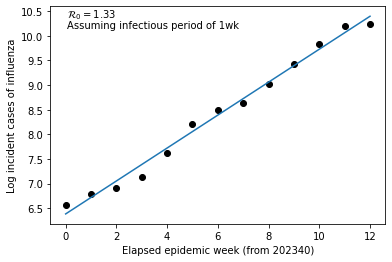

In [99]:
import pandas as pd
d = pd.read_csv("./data/FluView_StackedColumnChart_Data.csv")
d["ttl_flu"] = d["TOTAL A"] + d["TOTAL B"]

flu_early = d["ttl_flu"][:13] 
times = np.arange(len(flu_early))

fig,ax = plt.subplots()

ax.plot(times, np.log(flu_early), 'ko' )  

b1,b0 = np.polyfit(times, np.log(flu_early), 1 )

ax.plot(b0+b1*times, label="Estimate")

ax.set_ylabel("Log incident cases of influenza")
ax.set_xlabel("Elapsed epidemic week (from 202340)")

R0 = (7/7)*b1+1
ax.text(0.05,0.95,s=r"$\mathcal{R}_{0} = $" + "{:.2f}".format(R0), transform=ax.transAxes)
ax.text(0.05,0.90,s="Assuming infectious period of 1wk", transform=ax.transAxes)

plt.show()

From a linear regression fit to log incident cases we find that the slope equals 0.334. 
We can use this slope value to estimate the basic reproduction number 

\begin{align}
    \mathcal{R}_{0} &= 1 + \beta_{1} \times \left(\frac{1}{\gamma} \right) \\
                    &= 1 + 0.334 \times 7/7 \\
                    &= 1.33
\end{align}

For flu, typical estimates of $\mathcal{R}_{0}$ are between 1 and 2. Our estimate is in agreement with similar estimation techniques. 

## Epidemic burnout and final epidemic size 

The **final epidemic size** is defined as the total number of infected individuals at the end of the epidemic period (when $I=0$). 
For the SIR model, this includes either those who are actively infected or in the removed diseae category after the epidemic.
We can either compute the number of infected plus number of removed, or, we can compute the number of susceptible remaining at the end of the epidemic and find the final epidemic size as $N-S$.

Lets look again if we can find an expression for $S$. 
\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} \\ 
    \frac{dI}{dt} &= \beta S \frac{I}{N} - \gamma I \\ 
    \frac{dR}{dt} &= \gamma I\\ 
\end{align}

We notice that

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} \\ 
\end{align}

includes $I$ which makes it difficult to find a function $S$ that would solve the above differential equation. 
If we can "get rid" of $I$ then we may have a chance at a solution.
One trick, is to divide $\frac{dS}{dt}$ by $\frac{dR}{dt}$, 
\begin{align}
    \frac{dS}{dR} &= -\frac{\beta}{\gamma} \frac{S}{N} \\  
    \frac{dS}{dR} &= \overbrace{\left(-\mathcal{R}_{0} \frac{1}{N}\right)}^{\alpha}  S \\  
    S(0) &= S_{0}
\end{align}

We now have an expression with $\frac{dS}{dR}$ on the left.
On the right is a constant times $S$.
We recognize that an exponential function is a solution to this IVP

\begin{align}
    S(R) = S_{0} e^{ \left(-\mathcal{R}_{0} \frac{1}{N}\right) R(t) }
\end{align}

The above number of susceptibles is a function of $R$ (removed not $\mathcal{R}_{0}$).
We can re-express this function as the proportion of $S$ and proportion $R$ by dividing both sides by $N$

\begin{align}
    s(t) = s_{0} e^{ -\mathcal{R}_{0} r(t) }
\end{align}

After the epidemic there will be individuals in the S disease state or the R state. 
This means that $s = 1-r$ and so 

\begin{align}
    s(t) &= s_{0} e^{ -\mathcal{R}_{0} r(t) } \\
    1-r  &= s_{0} e^{ -\mathcal{R}_{0} r(t) } \\
    1-r - s_{0} e^{ -\mathcal{R}_{0} r(t) } &= 0 \\
\end{align}

In [100]:
def final_epi_size(s0):
    from scipy.optimize import root
    def f(r,s,R0):
        return 1-r-s*np.exp( -r*R0  )
    
    R0s = np.linspace(0.75,3,50)
    
    epi_sizes = []
    for R0 in R0s:
        epi_size = root(lambda r:f(r,s0,R0),0.5).x
        epi_sizes.append(epi_size)
        
    fig,ax = plt.subplots()
    ax.plot(R0s,epi_sizes)
    ax.set_xlabel(r"$\mathcal{R}_0$")
    ax.set_ylabel("Final Epidemic Size")
    ax.set_ylim(0,1)
    
    plt.show()
    
interact(final_epi_size, s0 = widgets.FloatSlider(value=1., min=0.2  , max=1., step=0.1,readout_format='.2f'))

interactive(children=(FloatSlider(value=1.0, description='s0', max=1.0, min=0.2), Output()), _dom_classes=('wi…

<function __main__.final_epi_size(s0)>

## Lasting Infection and steady-state 
Compartmental models like the SIR model are highly flexible. 
The modeler can add compartments that allow animals to belong to other disease states (e.g. hospitalization, death, subtypes of infection, etc.), and they can model parameters that depend on time or on covariates (e.g. influenza is thought to depend on the specific humidity in the environment).  

Lets examine three different types of models and methods to analyze them.


### SI model 
We'll start with the SI model. 
Anmals can belong to two disease states: susceptible or infected. 

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N}  \\ 
    \frac{dI}{dt} &= \beta S \frac{I}{N}
\end{align}

From the above system we see that once an animal is infected they will never clear the infection. 
This is life-long infection. 
Example of pathogens that infect aminals life-long are: [HIV](https://www.cdc.gov/hiv/index.html), [Varicella](https://www.cdc.gov/chickenpox/index.html), and the [Herpes virus](https://www.who.int/news-room/fact-sheets/detail/herpes-simplex-virus). 

One way to understand the behavior of a model is to estimate the **steady-state**.
For a dyamical system, like compartmental models, the steady state is a vector of values, one for each state, such that if the system starts at those values they remain there forever. 
A typical method to estimate the steady-state for a system is to find the values (in our case the value of S and I) such that the rate of change is zero. 

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} = 0  \\ 
    \frac{dI}{dt} &= \beta S \frac{I}{N}  = 0
\end{align}

The system 

\begin{align}
   -\beta S \frac{I}{N} &= 0  \\ 
   \beta S \frac{I}{N}  &= 0
\end{align}

will equal zero when either $S=0$ (and so then I=N), or if $I=0$ (and so then $S=N$).
The first steady state is intuitive.
Because an infector is always infectious, over an infinite amount of time every animal will become infected. 
The second state too is intuitive, if there exist no infector in the population and because no infected animals can enter the system, the population will always remain susceptible. 
This steady-state is so common that it is given the name **Disease Free Equilibirum**. 

#### Mathematical aside (Calc 1 Required [Optional])
Steady states can be repulsive or attracting.
To understand the behavior near steady states, we can investigate the behavior of 

\begin{align}
    x(t) = x^{*} +\epsilon(t). 
\end{align}

for the differential equation 

\begin{align}
    \frac{dx}{dt} = f(x). 
\end{align}

where $x^{*}$ are the values of our steady state. 
That is, we can describe the behavior of solutions a tiny bit away from the steady state. 
Do they contract back to the steady state? Do they instead move further away?

We can look at the derivative, the rate of change of $x(t)$ and so $(\epsilon(t))$,

\begin{align}
    \frac{dx}{dt} = \frac{ d [ x^{*} + \epsilon(t)]}{dt} = f(x) &= f(x^{*} + \epsilon(t))\\ 
    \frac{ d [ x^{*} + \epsilon(t)]}{dt} &= f(x^{*} + \epsilon(t)) \\ 
    \frac{ d [ \epsilon(t)]}{dt} &= f(x^{*} + \epsilon(t)) \hspace{3mm} (x^{*} \text{ is a constant}) \\ 
    \frac{d \epsilon}{dt} &=  f(x^{*}) + \epsilon(t) \left[ f^{'}(x^{*}) \right] \\ 
    \frac{d \epsilon}{dt} &=  \epsilon(t) \left[ f^{'}(x^{*}) \right] \\ 
     \epsilon(t) \propto e^{\left[ f^{'}(x^{*}) \right] t}
\end{align}

This means that if we take the derivative of the right hand side of out differential equation then we can understand if the small perturbations away from the steady state move back to $x^{*}$, when $f^{'}(x^{*})<0$ or if small perturbations cause the state to move further away from the steady-state $ f^{'}(x^{*})>0$. 

#### Behavior of SI steady-states

Lets look at the rate of infectors for the SI system, remembering that $S+I=N$
\begin{align}
    \frac{dI}{dt} &= \beta S \frac{I}{N}\\
                  &=  \frac{\beta  I\left( N-I  \right)}{N}
\end{align}

Lets take the Disease Free Equilibrium (I=0) and study the behavior of a small perturbation from this, or $x(t) = 0 + \epsilon(t)$. 
This can be read as "My solution will starts at disease free equilibrium plus some small positive value away from this point". 


\begin{align}
    \frac{dI}{dt}          &= \frac{\beta  I\left( N-I  \right)}{N}\\
    \frac{d[x^{*} + \epsilon(t)]}{dt} &= \frac{\beta  (0+\epsilon) \left( N-(0+\epsilon) \right)}{N}\\
    \frac{d[x^{*} + \epsilon(t)]}{dt} &= \frac{\beta \epsilon \left( N-\epsilon \right)}{N}
\end{align}

Lets stop a minute and try to understand 

\begin{align}
    \frac{d[x^{*} + \epsilon(t)]}{dt} 
\end{align}

We know that our steady state $x^{*}$ is a constant.
We're asking "What is the rate of change of a constant plus some function $\epsilon(t)$?".
Because a constant does not change

\begin{align}
    \frac{d[x^{*} + \epsilon(t)]}{dt} = \frac{d\epsilon(t)}{dt}  
\end{align}

Lets look at an example, the line 

\begin{align}
    \epsilon(t) = 2 + 4 t
\end{align}

We know that the derivative, the rate of change, for a line is the slope (in this example the value 4).
Let $x^{*} = -10$ and instead ask for the rate of change of 

\begin{align}
    x^{*} + \epsilon(t) &= -10 + \left(2 + 4 t\right) \\ 
                        &= -8 + 4 t.
\end{align}

When we shift our funciton by a constant the slope does not change---its still four. 
For this reason, shifting our function by the constant $x^{*}$ has no effect on the rate of change (i.e. the slope)

\begin{align}
    \frac{d[x^{*} + \epsilon(t)]}{dt} = \frac{d\epsilon(t)}{dt}.
\end{align}


Lets apply this idea to our infectious disease system 

\begin{align}
    \frac{d[x^{*} + \epsilon(t)]}{dt} &= \frac{\beta \epsilon \left( N-\epsilon \right)}{N}\\
    \frac{d\epsilon(t)}{dt} &= \frac{\beta \epsilon \left( N-\epsilon \right)}{N}\\
\end{align}

Note, if the rate of change of epsilon is positive then $\epsilon(t)$ will grow away from the steady state.
The steady state will be called **repelling**.
Instead, if the rate of change is negatvie then $\epsilon(t)$ will shrink towards the stead state.
The steady state will be called **attracting**.


If $\epsilon$ is a small positive number (say 0.5) then 

\begin{align}
    \frac{\epsilon(t)}{dt} &= \frac{\beta \times 0.5 \times \left( N-0.5 \right)}{N},
\end{align}

and because N is likely greater than 0.5 and $\beta$ is a positive number, $\epsilon(t)$ will grow away from the steady-state (called the disease free equilibrium).
The disease free equilibrium is a repelling state. 

We can use the same reasoning for the $I=N$ steady state 

\begin{align}
    \frac{N-\epsilon(t)}{dt} &= \frac{\beta \times (N-1) \times \left( N-(N-1) \right)}{N}\\
    \frac{-d \epsilon(t)}{dt}  &= \frac{\beta \times (N-1) \times \left( N-(N-1) \right)}{N}\\
    \frac{d \epsilon(t)}{dt}   &= -\frac{\beta \times (N-1) \times \left( N-(N-1) \right)}{N}
\end{align}

For the same reasoning, the change in $\epsilon$ will be negative. The steady state is attracting. 

This was a fun mathemtical exercise, but what does this mean in the context of public health and outbreaks? 
If a pathogen is introduced in a population that exhibits SI dynamics, then even a very very small number of infectors will cause the entire population to be infected (DFE is repelling). 
If, instead, we observe a population with a large proportion of infected individuals that also exhibit SI dynamics then it will be difficult to move them towards a DFE. 

In [101]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

import numpy as np
import matplotlib.pyplot as plt 

def si_model(beta):
    from scipy.integrate import solve_ivp
    import scipy

    N = 1000 #--number of animals in system 

    #--SIR differential equations
    def si(t,y, beta):
        s,i, = y
        ds_dt = -beta*s*(i/N)
        di_dt =  beta*s*(i/N)
        return [ds_dt, di_dt]

    #--start and end times 
    start,end = 0., 30

    #--times that we want to return s(t), i(t), r(t)
    tvals = np.arange(start,end+0.1,0.5)

    #--inital conditions for s, i, r
    initial_conditions = np.array((N-1,1))

    #--function to return s,i,r over time
    solution1 = solve_ivp( fun = si
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (beta,))

    
    #--small perturbation from DFE
    #--inital conditions for s, i, r
    initial_conditions = np.array((N-0.0001,0.0001))

    #--function to return s,i,r over time
    perturbation1 = solve_ivp( fun = si
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (beta,))
    
    #--inital conditions for s, i, r
    initial_conditions = np.array((1,N-1))

    #--function to return s,i,r over time
    solution2 = solve_ivp( fun = si
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (beta,))

    
    #--small perturbation from DFE
    #--inital conditions for s, i, r
    initial_conditions = np.array((1,N-1))

    #--function to return s,i,r over time
    perturbation2 = solve_ivp( fun = si
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (beta,))

    fig,ax = plt.subplots()
        
    ax.plot( tvals, solution1.y[1,:], label = r"$I_{0}=1$" )
    ax.plot( tvals, perturbation1.y[1,:] , label ="Small perturbation from DFE")
    ax.plot( tvals, perturbation2.y[1,:], label = r"Small perturbation from $I=N$" )
    
    ax.legend(loc="lower right")
    
    ax.set_ylim(0,1010)
    ax.set_xlim(0,40)
    
    plt.show()
    
interact(si_model, beta = widgets.FloatSlider(value=1., min=0.4  , max=3., step=0.1,readout_format='.2f'))

interactive(children=(FloatSlider(value=1.0, description='beta', max=3.0, min=0.4), Output()), _dom_classes=('…

<function __main__.si_model(beta)>

## Latent Disease and Endemic Disease

### SEIR model 

One way to add-in a latent period is to assume four disease states: susceptible, exposed, infectious, and removed. When an animal enters the exposed category the pathogen was successfully transmitted to the susceptible animal. However, there is on average $(1/\sigma)$ time units for the pathgoen to build in the suscpetible's system before they move to the infectious category. 

\begin{align}
    \frac{dS}{dt} &= -\beta S \frac{I}{N} \\ 
    \frac{dE}{dt} &= \beta S \frac{I}{N} - \sigma E \\
    \frac{dI}{dt} &= \sigma E - \gamma I \\ 
    \frac{dR}{dt} &= \gamma I
\end{align}





## Endemic diseases

An infectious disease is considered **endemic** when the pathogen is always present in the population, or over a long time span, and confined within a specific location. 
Examples of endemic diseases are Polio (endemic to Afghanistan), Measles (before vaccination), and Chagas (endemic to Mexico). 

In order for a disease to be endemic, individuals who are immune must again become suscpetible to infection at a later time point. That is, individuals cannot stay in the "removed" disease state for forever (such as with the SIR model) or the infectious disease would die-out.

A common model for endemic disease is the SIS model 

\begin{align}
    \dot{S} &= -\beta S \frac{I}{N} + \gamma I \\ 
    \dot{I} &=  \beta S \frac{I}{N} - \gamma I \\ 
    &S(0)=S_{0}; I(0)=I_{0}
\end{align}

where we use the notation $\dot{S} = \frac{dS}{dt}$ to represent the derivative with respect to time. 

In [102]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

import numpy as np
import matplotlib.pyplot as plt 

def sir(R0,S0):
    
    gamma= 1
    beta = R0*gamma
    
    from scipy.integrate import solve_ivp
    import scipy

    N = 1000 #--number of animals in system 

    #--SIR differential equations
    def sir(t,y, beta, gamma):
        s,i= y
        ds_dt = -beta*s*i/N + gamma*i
        di_dt =  beta*s*i/N - gamma*i
        
        return [ds_dt, di_dt]

    #--start and end times 
    start,end = 0., 400

    #--times that we want to return s(t), i(t), r(t)
    tvals = np.arange(start,end+0.1,0.5)

    #--inital conditions for s, i, r
    initial_conditions = np.array((S0-1, N-(S0-1)))

    #--parameters for the model 
    #beta, gamma = 3, 2

    #--function to return s,i,r over time
    solution = solve_ivp( fun = sir
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (beta, gamma))
    incidence = np.append( 0.00, np.diff(solution.y[-1,:]) )

    fig,ax = plt.subplots()
    
    #ax.plot(tvals,solution.y[0,:], label="S")
    ax.plot(tvals,solution.y[1,:], label="I")
    
    ax.set_ylim(0,1000)
    
    plt.ylabel("Number of individuals in disease state")
    plt.xlabel("Time")

    ax.axhline(1000-1000*(1/R0), ls="--",color="red")
    
    plt.show()
    
interact(sir, 
         R0 = widgets.FloatSlider(value=3/2, min=1/2  , max=3 , step=0.5,readout_format='.4f',),
         S0 = widgets.FloatSlider(value=  1000, min=100, max=1000, step=10,readout_format='.4f',),
        )

interactive(children=(FloatSlider(value=1.5, description='R0', max=3.0, min=0.5, readout_format='.4f', step=0.…

<function __main__.sir(R0, S0)>

Lets compute the steady-states for an ifnecitous disease that follows SI dynamics. 
At steady state, the number of susceptible individuals is no longer changing ($\dot{S}=0$) and number of infected individuals is no longer changing ($\dot{I}=0$). 

We can find which conditions make $\dot{I}=0$, as follows

\begin{align}
    \dot{I} =  \beta S \frac{I}{N} - \gamma I &= 0\\
            I\left( \beta \frac{S}{N} - \gamma  \right) &= 0\\ 
\end{align}

We see that there are two possible ways to make the expression on the left equal to zero. 

\begin{align}
            I   &= 0\\
            S   &= N \frac{\alpha}{\beta} = N \left(\frac{\beta}{\gamma}\right)^{-1} = \frac{N}{\mathcal{R}_{0}} \\ 
\end{align}

## Periodic forcing and Seasonal infectious diseases

Many infectious diseases are endemic to a location but go through epidemic-like periods.
These types of infectious diseases are sometimes called "seasonal". 
For example, in the Northern Hemispehere, influenza is seasonal.
The intensity of influenza begins to increase in October, reaches peak Jan-Feb, and then decays back down to a nominal level. 
When the "flu season" is not active, influenza is persistent in places like the US with a prevalence of ~2%.


One way to model seasonal infectious diseases is by assuming that the $\beta$ in the SI model depends on time. 
That is, we assume $\beta(t)$ is a function instead of a constant ($\beta$). 

\begin{align}
   \beta(t) = a(1 + b\cos[ \omega t ])
\end{align}

where $a$ is the baseline transmission rate, $b$ is the seasonal amplitude, and $\omega$ is the forcing period.
One way to set $\omega t$ is as 

\begin{align}
   \omega t = \frac{2 \pi}{P} (t-c) 
\end{align}

then, $\omega t$ is largest at the time units $c, c+P, c+2P, \cdots$



In [105]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

import numpy as np
import matplotlib.pyplot as plt 

def sir(b,S0):
    
    gamma= 0.5
    a = 50
    
    from scipy.integrate import solve_ivp
    import scipy

    N = 1000 #--number of animals in system 

    def beta(t,a,b,T):
        return b*(1+np.cos( 2*np.pi*(t-a)/T ))
    
    #--SIR differential equations
    def sir(t,y,beta_func,gamma):
        s,i= y
        ds_dt = -beta_func(t)*s*i/N + gamma*i
        di_dt =  beta_func(t)*s*i/N - gamma*i
        return [ds_dt, di_dt]

    #--start and end times 
    T=320
    
    start,end = 0., T

    #--times that we want to return s(t), i(t), r(t)
    tvals = np.arange(start,end+0.1,0.5)

    #--inital conditions for s, i, r
    initial_conditions = np.array((S0-1, N-(S0-1)))

    #--function to return s,i,r over time
    solution = solve_ivp( fun = sir
                         , t_span = (start,end)
                         , y0     = initial_conditions
                         , t_eval = tvals
                         , args   = (lambda t: beta(t,a,b,100), gamma))
    incidence = np.append( 0.00, np.diff(solution.y[-1,:]) )

    fig,axs = plt.subplots(2,1, figsize=(10,5))
    
    ax = axs[0]
    ax.plot(tvals,beta(tvals,a,b,100), label="I")
    ax.set_ylabel(r"$\beta(t)$")
    
    ax.set_ylim(0,4)
    ax.axhline(1.0,color="red")
    
    ax = axs[1]
    ax.plot(tvals,solution.y[1,:], label="I")
    
    ax.set_ylim(0,1000)
    
    plt.ylabel("Number of infected individuals")
    plt.xlabel("Time")

    #ax.axhline(1000-1000*(1/R0), ls="--",color="red")
    
    plt.show()
    
interact(sir, 
         b = widgets.FloatSlider(value=3/2, min=1/5  , max=2 , step=0.10,readout_format='.4f',),
         S0 = widgets.FloatSlider(value=  1000, min=100, max=1000, step=10,readout_format='.4f',),
        )

interactive(children=(FloatSlider(value=1.5, description='b', max=2.0, min=0.2, readout_format='.4f'), FloatSl…

<function __main__.sir(b, S0)>

## Homework 

1. Please compute the rate of individuals that move from susceptible to infected, given the following information
    1. C = 2  , N = 1000  , p=0.004, I = 100
    2. C = 2  , N = 1000  , p=0.004, I = 200
    3. C = 1.5, N = 1000, p=0.004, I = 200
    
2. In the section "The SIR compartmental model" we developed the SIR model for the number of individuals in the S, I, and R compartments. Please redefine this model for disease states s,i,r (lower case) that represent the **proportion** of individuals in disease states: susceptible, infected, and removed. You can compute the proportion by dividing each equation by the number of individuals in the system.

3. For the SIR model we saw that $\frac{d I}{dt} = S \beta \frac{I}{N} - \gamma I$.
    1. Intuitively, what conditions would need to be met on the right hand side of the equals for the rate of infected individuals to increase? (Justify your answer) 
    2. What conditions would need to be met on the right hand side of the equals for the rate of infected individuals to decrease? (Justify your answer)
    3. Is it possible for there to be a constant number of infected individuals over time? If so, what are those conditions? (Justify your answer)

4. Please decide (and briefly justify) whether it is more reasonable that the following pathogens are subject to density-dependent or frequency-dependent transmission. 
    1. Influenza
    2. Syphillis
    3. Chikungunya
    4. Measles 
    5. Hepatitis C   

5. Suppose you are a public health official tracking a novel outbreak in your jurisdiction. Epidemiologists, clinicians, and lab technicians work together to estimate the average infectious period of an individual as 7 days, the probability of transmission as 0.10, and the average number of contacts in the city as 4. Your jurisdiction is 19.4 $\text{mi}^2$ and the last census reported a population of 28,591 people. 
    1. Please compute $\gamma$ for the above SIR model.
    2. If the infectious agent causing the outbreak is density dependent then please compute $\beta^{*}$
    3. What are the units for the above density-dependent $\beta^{*}$?
    3. If the infectious agent causing the outbreak is frequency dependent then please compute $\beta^{*}$
    4. What are the units for the above frequency dependent $\beta^{*}$?

One method for estimating a system of differential equations like the SIR model is called Euler's method. 
Euler's method supposes that we can discretize $\frac{d S}{dt}$ into the finite difference $ \frac{S(t+\epsilon) - S(t)}{\epsilon} $; $\frac{d I}{dt}$ into the finite difference $ \frac{I(t+\epsilon) - I(t)}{\epsilon} $; and $\frac{d R}{dt}$ into the finite difference $ \frac{R(t+\epsilon) - R(t)}{\epsilon} $.

Then our SIR system becomes 
\begin{align}
    \frac{S(t+\epsilon) - S(t)}{\epsilon} &= -\beta S(t) I(t) \\ 
    \frac{I(t+\epsilon) - I(t)}{\epsilon} &=  \beta S(t) I(t) - \gamma I(t) \\ 
    \frac{R(t+\epsilon) - R(t)}{\epsilon} &=  \gamma I(t)\\ 
\end{align}

6. Use algebra to rewrite the above system and fill in the question marks

\begin{align}
    S(t+\epsilon) &=  ? \\ 
    I(t+\epsilon) &=  ? \\ 
    R(t+\epsilon) &=  ?\\ 
\end{align}

7. Suppose that $S(0)=100, I(0)=1, R(0)=0; \beta=2; \gamma=0.5$. Please compute I(1) using $\epsilon=1/2$. You will need to first compute $S(1/2)$, $I(1/2)$, $R(1/2)$ and then use these answers to compute $I(1)$. 

8. Let $\beta=1/2$, $\gamma=4/10$, $I_{0}=1$, $N=1000$, and $S_{0}=800$. 
    1. Will an outbreak begin? Please justify your answer. 
    2. Please use the above to compute the Herd Immunity Threshold assuming dynamics follow the SIR.
    3. As a public health official, should you issue policies in your jurisdiction to prevent an outbreak? If so, what do you recommend? 

9. When deriving the Herd Immunity Threshold for the SIR model, we skipped a few steps in between 
$\frac{S}{N} \leq \frac{1}{\mathcal{R}_{0}}$ and $\text{immune} \geq 1 - \frac{1}{\mathcal{R}_{0}}$. 
Can you fill in the steps between these two inequalities in more detail? 

10. Suppose a small number of patients enter the ICU, complaining of shortness of breath, fever, and symptoms consistent with a novel pathogen. You find that the infectious duration of this pathogen is 2 weeks and that the probability of transmission between an infector and susceptible is 1/2. What would be your objective(s) as a public health official to prevent an outbreak in a (close to) entirely susceptible population? 

11. Suppose you estimate the basic reproduction number for a pathogen as $\mathcal{R}_{0} = 3/4$. 
Please compute the Herd Immunity Threshold and comment on what you find. 
Should you attempt to vaccinate, or otherwise prevent cases of this pathogen?
Would you need to know more about this particular pathogen to decide on policy changes or prevention? If yes then what information would you like to know? 

12. Please download the dataset [US 2022/2023 Flu Season](https://github.com/computationalUncertaintyLab/outbreak_book/blob/main/outbreak_science/data/USFlu_2022_2023_Season.csv) that includes the number of influenza A and influenza B cases per week in the US. 
   1. Create a new column that adds the TOTAL A and TOTAL B case together. 
   2. Fit a linear regression to the first 10 weeks (up until epidemic week 50 os Year 2022) of log incident cases. 
   3. Use the above linear regression fit to estimate the basic reproduction number. 

13. For any function $f(t)$, the value of $t$ where the derivative of $f(t)$ equals zero $(\frac{df}{dt} = 0)$ is either a maximum or minimum of the function $f$. For the SIR model, please find conditions for when $\frac{dI}{dt} = 0$. There are two, one that should look like $S = ?$ and a second $I=?$. 


14. Consider the SI model with vital dynamics
\begin{align}
    \frac{dS}{dt} &= N \mu - \beta S \frac{I}{N} - \mu S \\ 
    \frac{dI}{dt} &=         \beta S \frac{I}{N} - \mu I \\ 
\end{align}

where the term $N \mu$ represents an influx of susceptibles into the population, and $(- \mu S)$ and ($- \mu I$) represent individuals dieing at a rate of $\mu$ which do not necessarily have to do with the pathogen under study. Please compute the two steady-states. 

15. For the SI model above in the notes (without vital dynamics), we saw that there exist two steady states: when the number of infectors equals zero or when the number of susceptibles equals $N\left(\frac{\beta}{\alpha}\right)^{-1}$. The corresponding plot of the SI steady state above shows the number of infected. 
Please convert the steady state $S= N\left(\frac{\beta}{\alpha}\right)^{-1}$, which is in terms of the number of susceptible individuals, into a steady state for the number of infectors (i.e. $I=?$).

16. For the SI model above in the notes (without vital dynamics), what is the proportion of infected individuals in steady state? In other words, what is the number of infected individuals after some long amount of time has passed? 

17. For the SI model with vital dynamics above, what is the proportion of infected individuals in steady state? Hint: use your knowledge of the SI model with**out** vital dynamics and the steady-state which is not the disease free equilibirum. Double Hint: that steady-state which is not the DFE is an attracting state. 

18. Please comment on the following statement: If an endemic infection disease follows S-I dynamics, and this disease has already reached a steady-state then there is really no reason to consider intervening upon the population to reduce the burden of this disease. 

19. Intuitively describe why the number of infected individuals will grow more slowly for the SEIR model compared to the SIR model. Does this have implications in how public health should treat a pathogen exhibiting SIR vs SEIR dynamics? 